<a href="https://colab.research.google.com/github/DaviFerreira0106/notebooks-inteligenciaArtificial/blob/main/Analise_de_pa%C3%ADses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupar países com base em fatores socioeconômicos e de bem-estar para identificar grupos de países com perfis semelhantes.

## Carregar o Dataset: Use bibliotecas como pandas para carregar o dataset e fazer uma análise exploratória inicial

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Instalando KaggleHub
!pip install kagglehub

# 2. Instalar dataset coutryData CSV
import kagglehub

path = kagglehub.dataset_download("unsdsn/world-happiness")

# 3. Carregar DataSet
dataset = pd.read_csv(path + '/2019.csv')

# 4. Análise Exploratória Inicial
print(dataset.head())
print(dataset.info())
print(dataset.describe())




   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

## Normalização: Normalize as variáveis, especialmente porque as escalas de variáveis como PIB per capita e Generosidade podem variar bastante

In [20]:
# NOrmalizando as variáveis
x = dataset.drop(['Country or region', 'Overall rank', 'Score'], axis = 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
#

## Determinação do Número de Clusters: Utilize o método do cotovelo ("Elbow Method") e o índice de silhueta para determinar o número adequado de clusters.

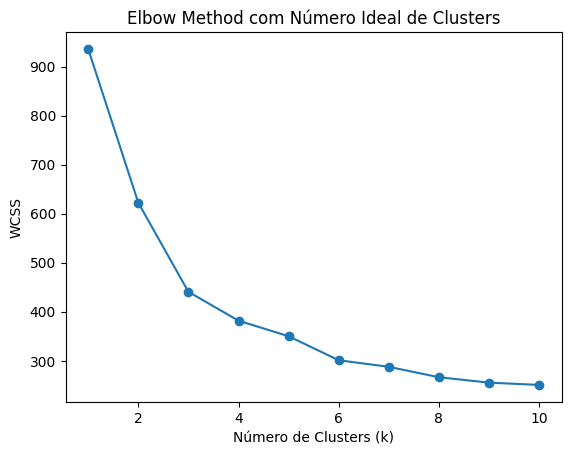

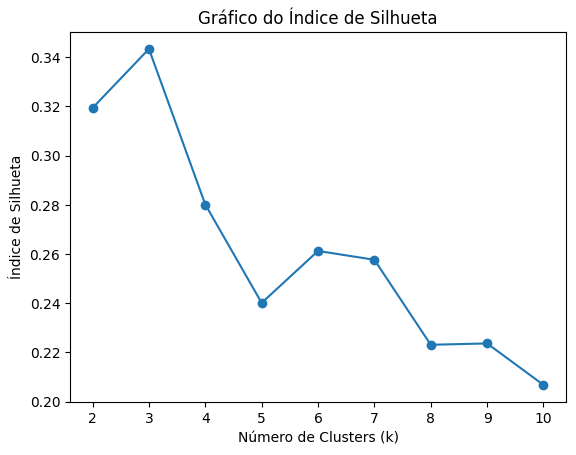

In [21]:
# Iniciando modelo Kmeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Metodo Elbow
wcss = []

# Executar o K-Means para valores de k de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico WCSS vs. número de clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method com Número Ideal de Clusters')
plt.show()

# Metodo utilizando íncide de silhueta
silhouette_scores = []
for k in range(2, 11):
    kmeans = k  = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silhueta')
plt.title('Gráfico do Índice de Silhueta')
plt.show()


## Clusterização com K-Means: Aplique o K-Means para identificar agrupamentos de países baseados nos fatores de felicidade e bem-estar

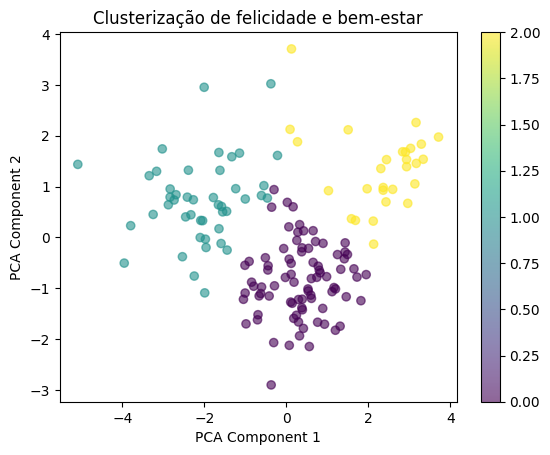

In [23]:
# 4. Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Visualizar os clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusterização de felicidade e bem-estar')
plt.colorbar()
plt.show()


## Interpretação dos Resultados: Explore os clusters resultantes para entender quais fatores contribuem para diferentes perfis de felicidade entre os países.